<a href="https://colab.research.google.com/github/Emilyjane994/Phenotype-paper/blob/main/IBM_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Manuscript

/content/gdrive/My Drive/Manuscript


In [ ]:
import pickle
from ML_Pipeline.utils import read_data
from ML_Pipeline.ml_model import scale_data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

## Original data

In [ ]:
# Read the initial datasets
df_main = read_data("input/ML_dataset.xlsx")

In [ ]:
df_main.head()

,ID#,Pathology,Age,Sex,cN1A status,TCRgd,Vd2,Vd2+Vg9+,Vd2CD27-,Vd2+Cx3Cr1+,...,monocytes,Nkcells,Basophils,cDC,CD56-16b,CD56b,CD56dim,classical_monocytes,int_monocytes,inflam_monocytes
0,HC1,HC,68,M,Healthy,5.07,8.99,88.2,41.7,23.70,...,1.7690,0.2684,0.0729,0.0346,48.0332,5.5944,46.3724,93.5473,3.7536,2.5068
1,HC2,HC,73,M,Healthy,3.31,4.16,82.9,84.4,19.90,...,2.0229,0.7299,0.0586,0.1710,6.3267,9.3175,83.7040,91.4568,8.0935,0.3113
2,HC3,HC,76,M,Healthy,2.29,4.90,93.3,26.3,6.11,...,0.9251,1.3357,0.0298,0.0083,4.0046,2.4337,93.3299,56.3302,37.7022,5.4843
3,HC4,HC,47,M,Healthy,4.96,52.60,66.6,35.2,40.00,...,1.0097,1.1593,0.0152,0.0022,81.9997,0.9686,16.9870,82.0701,16.1163,2.5150
4,HC5,HC,49,F,Healthy,1.82,54.00,96.4,24.6,61.70,...,1.8146,2.4483,0.0573,0.0309,15.4730,3.9977,81.4437,97.3687,2.5549,0.0546


In [ ]:
filter = (df_main['Pathology']=='IBM')

In [ ]:
df_Kmeans = df_main [filter]

In [ ]:
df_Kmeans.head()

,ID#,Pathology,Age,Sex,cN1A status,TCRgd,Vd2,Vd2+Vg9+,Vd2CD27-,Vd2+Cx3Cr1+,...,monocytes,Nkcells,Basophils,cDC,CD56-16b,CD56b,CD56dim,classical_monocytes,int_monocytes,inflam_monocytes
45,IBM1,IBM,77,F,SERONEGATIVE,2.01,0.10,100.0,100.00,100.00,...,1.2437,1.7545,0.1978,0.0215,40.6818,6.8182,51.3182,62.8407,32.5104,4.3604
46,IBM2,IBM,72,M,SEROPOSITIVE,1.55,56.00,36.1,51.30,65.80,...,2.8868,4.1113,0.4441,0.1068,5.2128,5.7548,88.4338,77.3706,13.2434,2.1211
47,IBM3,IBM,98,M,SERONEGATIVE,4.36,5.47,97.7,7.95,7.39,...,2.5411,4.5015,0.1263,0.0755,50.9316,0.9435,48.8349,76.6577,11.8605,5.1916
48,IBM4,IBM,62,M,SEROPOSITIVE,0.52,60.24,27.0,26.00,13.00,...,1.6238,0.8723,0.1069,0.1582,5.2013,3.7763,90.0606,87.1038,3.1962,0.3636
49,IBM5,IBM,76,M,SERONEGATIVE,3.03,1.61,100.0,30.30,63.60,...,3.1385,5.9818,0.1829,0.0651,6.2654,1.8280,91.7649,76.0554,23.3342,25.4420


In [ ]:
df = df_Kmeans.copy()

In [ ]:
df = df.replace({
    "cN1A status": {"SERONEGATIVE":0, "SEROPOSITIVE":1},
    "Sex":{"M":0, "F":1}
    })

In [ ]:
df_scale = scale_data(df,class_col='dummy',cols_to_exclude=['ID#','Pathology'])

In [ ]:
df_scale.head()

,ActTreg,Age,Basophils,Bcells,CD4,CD4+CD27-,CD4+CD28-,CD4+IFNg,CD4+IFNg+Perf+,CD4+IL17A,...,Vd2+Vg9+,Vd2CD27-,Vd2CD57+,cDC,cN1A status,classical_monocytes,inflam_monocytes,int_monocytes,monocytes,pDC
0,-0.790858,0.457254,0.411561,0.706588,1.050209,-0.780734,-0.851878,-0.647991,-0.760300,0.991883,...,1.260276,2.628132,2.745988,-0.699420,-0.687552,-1.284509,-0.216350,1.959330,-0.836770,0.395666
1,1.290653,-0.060031,2.537491,1.707475,-0.925606,0.033212,0.180457,-0.583547,-0.496535,0.399773,...,-0.405640,0.816645,-0.638611,0.152588,1.454436,-0.132452,-0.605220,-0.153640,0.747742,-0.407101
2,-0.131007,2.629851,-0.205589,0.989371,-1.274442,3.098628,2.739981,1.839202,3.405485,2.008048,...,1.200313,-0.795838,-0.684580,-0.160048,-0.687552,-0.188977,-0.072006,-0.305300,0.414369,-0.234198
3,-0.341779,-1.094600,-0.373039,-0.765252,-0.740753,-0.151939,-0.148052,-0.207211,-0.606441,-0.702240,...,-0.642883,-0.124435,-0.101384,0.665990,1.454436,0.639280,-0.910422,-1.255495,-0.470223,0.543869
4,1.290414,0.353797,0.282952,1.712871,-0.385675,0.925741,0.140829,-1.032031,-0.577367,-0.557154,...,1.260276,0.035512,-0.476688,-0.263927,-0.687552,-0.236733,3.444617,0.952996,0.990468,0.185711


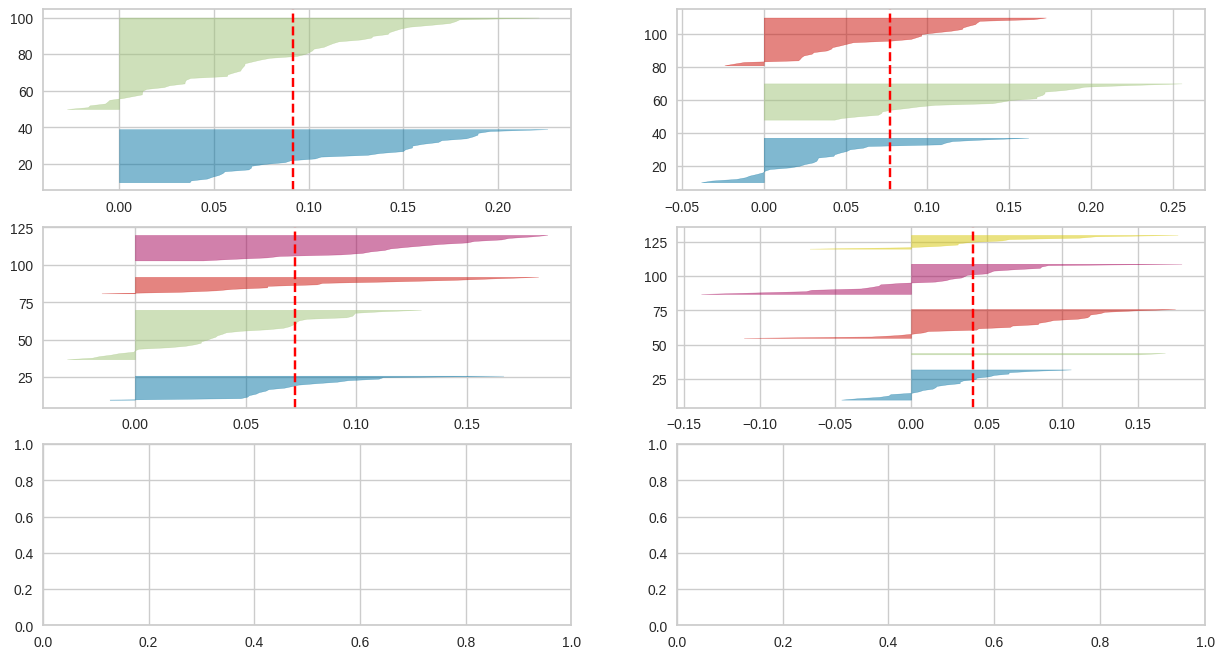

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scale)

In [ ]:
import plotly.graph_objects as go  #for 3D plot

## K-means using k = 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(df_scale)
y_kmeans = kmeans.predict(df_scale)

## 3D plot
Scene = dict(xaxis = dict(title  = 'NKT -->'),yaxis = dict(title  = 'CD8+Tbet--->'),zaxis = dict(title  = 'CD8+IFNg+Perf+-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=np.array(df_scale['NKT']), y=np.array(df_scale['CD8+Tbet']), z=np.array(df_scale['CD8+IFNg+Perf+']), mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
# trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

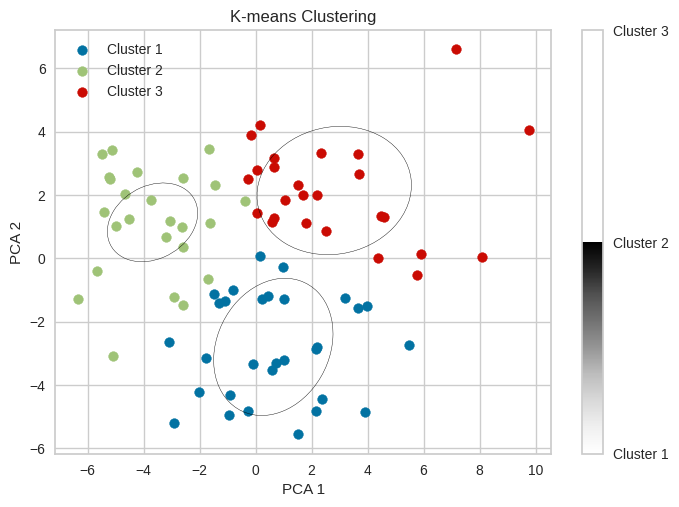

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# K-means using k = 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(df_scale)
y_kmeans = kmeans.predict(df_scale)

# Dimensionality reduction using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_scale)

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the three clusters
for i in range(3):
    ax.scatter(X_pca[y_kmeans==i, 0], X_pca[y_kmeans==i, 1], label='Cluster '+str(i+1))

# Add ellipses around the clusters
for i in range(3):
    cov = np.cov(X_pca[y_kmeans==i].T)
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=(np.mean(X_pca[y_kmeans==i, 0]), np.mean(X_pca[y_kmeans==i, 1])),
                  width=lambda_[0]*2, height=lambda_[1]*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ell.set_edgecolor('black')
    ax.add_artist(ell)

# Add legend and color scale
ax.legend()
cbar = plt.colorbar(ax.collections[0])
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])

# Add axis labels and title
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('K-means Clustering')

# Show the plot
plt.show()



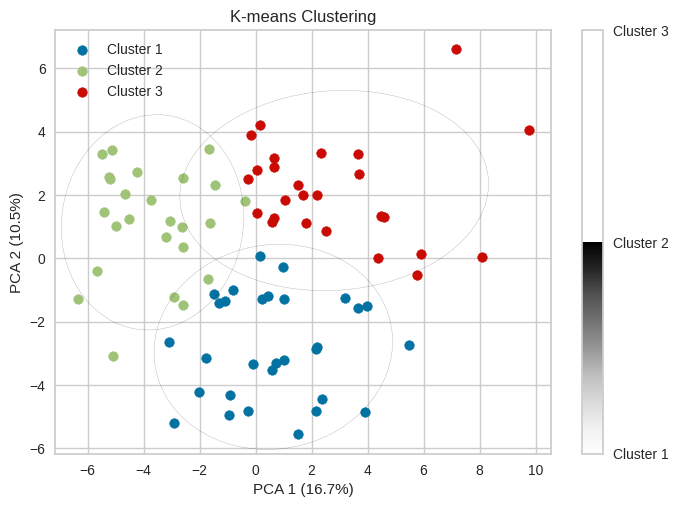

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# K-means using k = 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(df_scale)
y_kmeans = kmeans.predict(df_scale)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scale)

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the three clusters
for i in range(3):
    ax.scatter(X_pca[y_kmeans==i, 0], X_pca[y_kmeans==i, 1], label='Cluster '+str(i+1))

# Add ellipses around the clusters
for i in range(3):
    # compute the mean and covariance matrix of all the points in the cluster
    cov = np.cov(X_pca[y_kmeans==i].T)
    mean = np.mean(X_pca[y_kmeans==i], axis=0)

    # compute the eigenvalues and eigenvectors of the covariance matrix
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)

    # draw the ellipse
    ell = Ellipse(xy=mean,
                  width=lambda_[0]*4, height=lambda_[1]*4,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  alpha=0.3)
    ell.set_facecolor('none')
    ell.set_edgecolor('black')
    ax.add_artist(ell)

# Add legend and color scale
ax.legend()
cbar = plt.colorbar(ax.collections[0])
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])

# Add axis labels and title
ax.set_xlabel('PCA 1 ({:.1f}%)'.format(pca.explained_variance_ratio_[0]*100))
ax.set_ylabel('PCA 2 ({:.1f}%)'.format(pca.explained_variance_ratio_[1]*100))
ax.set_title('K-means Clustering')

# Show the plot
plt.show()


In [ ]:
df_scale['clusterNo'] = y_kmeans
df_Kmeans['clusterNo'] = y_kmeans

In [ ]:
df_scale.groupby(['clusterNo','Sex']).count()

ActTreg  Age  Basophils  Bcells  CD4  CD4+CD27-  \
clusterNo Sex                                                          
0         -0.829156       17   17         17      17   17         17   
           1.206045       11   11         11      11   11         11   
1         -0.829156       12   12         12      12   12         12   
           1.206045       11   11         11      11   11         11   
2         -0.829156       19   19         19      19   19         19   
           1.206045       11   11         11      11   11         11   

                     CD4+CD28-  CD4+IFNg  CD4+IFNg+Perf+  CD4+IL17A  ...  \
clusterNo Sex                                                        ...   
0         -0.829156         17        17              17         17  ...   
           1.206045         11        11              11         11  ...   
1         -0.829156         12        12              12         12  ...   
           1.206045         11        11              11         11  ...   
2         -0.829156         19        19              19         19  ...   
           1.206045         11        11              11         11  ...   

                     Vd2+Vg9+  Vd2CD27-  Vd2CD57+  cDC  cN1A status  \
clusterNo Sex                                                         
0         -0.829156        17        17        17   17           17   
           1.206045        11        11        11   11           11   
1         -0.829156        12        12        12   12           12   
           1.206045        11        11        11   11           11   
2         -0.829156        19        19        19   19           19   
           1.206045        11        11        11   11           11   

                     classical_monocytes  inflam_monocytes  int_monocytes  \
clusterNo Sex                                                               
0         -0.829156                   17                17             17   
           1.206045                   11                11             11   
1         -0.829156                   12                12             12   
           1.206045                   11                11             11   
2         -0.829156                   19                19             19   
           1.206045                   11                11             11   

                     monocytes  pDC  
clusterNo Sex                        
0         -0.829156         17   17  
           1.206045         11   11  
1         -0.829156         12   12  
           1.206045         11   11  
2         -0.829156         19   19  
           1.206045         11   11  

[6 rows x 68 columns]

In [ ]:
df_Kmeans.head()

,ID#,Pathology,Age,Sex,cN1A status,TCRgd,Vd2,Vd2+Vg9+,Vd2CD27-,Vd2+Cx3Cr1+,...,Nkcells,Basophils,cDC,CD56-16b,CD56b,CD56dim,classical_monocytes,int_monocytes,inflam_monocytes,clusterNo
45,IBM1,IBM,77,F,SERONEGATIVE,2.01,0.10,100.0,100.00,100.00,...,1.7545,0.1978,0.0215,40.6818,6.8182,51.3182,62.8407,32.5104,4.3604,2
46,IBM2,IBM,72,M,SEROPOSITIVE,1.55,56.00,36.1,51.30,65.80,...,4.1113,0.4441,0.1068,5.2128,5.7548,88.4338,77.3706,13.2434,2.1211,0
47,IBM3,IBM,98,M,SERONEGATIVE,4.36,5.47,97.7,7.95,7.39,...,4.5015,0.1263,0.0755,50.9316,0.9435,48.8349,76.6577,11.8605,5.1916,0
48,IBM4,IBM,62,M,SEROPOSITIVE,0.52,60.24,27.0,26.00,13.00,...,0.8723,0.1069,0.1582,5.2013,3.7763,90.0606,87.1038,3.1962,0.3636,2
49,IBM5,IBM,76,M,SERONEGATIVE,3.03,1.61,100.0,30.30,63.60,...,5.9818,0.1829,0.0651,6.2654,1.8280,91.7649,76.0554,23.3342,25.4420,0


In [ ]:
df_Kmeans.to_excel("input/cluster/KMeans.xlsx", index=False)